In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import sleep
# Import API key
import API_KEY

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
API=API_KEY.API_Key

In [46]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['karaul', 'banda aceh', 'busselton', 'cidreira', 'puerto ayora', 'albany', 'kapaa', 'sarangani', 'port alfred', 'longyearbyen', 'moron', 'pevek', 'ushuaia', 'ancud', 'hope', 'mataura', 'punta arenas', 'tiksi', 'chuy', 'atuona', 'batagay-alyta', 'hermanus', 'moyale', 'yarmouth', 'kokopo', 'rikitea', 'trinidad', 'samarai', 'vardo', 'bluff', 'barrow', 'tonantins', 'butaritari', 'illoqqortoormiut', 'qandahar', 'nome', 'walvis bay', 'monywa', 'arraial do cabo', 'zarand', 'taoudenni', 'hobart', 'ponta do sol', 'pisco', 'tuktoyaktuk', 'coos bay', 'narsaq', 'kargil', 'medicine hat', 'sturgeon bay', 'acuitzio', 'saint-philippe', 'bima', 'los llanos de aridane', 'grand river south east', 'beringovskiy', 'onega', 'port lincoln', 'provideniya', 'chokurdakh', 'miyako', 'nhulunbuy', 'tasiilaq', 'cherskiy', 'karpathos', 'wairoa', 'kangaatsiaq', 'severo-kurilsk', 'taolanaro', 'richards bay', 'swan hill', 'barentsburg', 'amderma', 'qasigiannguit', 'gondanglegi', 'vila franca do campo', 'isangel', 'kud

In [47]:
url=f"http://api.openweathermap.org/data/2.5/weather?q=todos santos&APPID={API}&units=imperial"
print(url)

http://api.openweathermap.org/data/2.5/weather?q=todos santos&APPID=e63f8f66c81c334e5dedfcb349b3031c&units=imperial


In [48]:
res= requests.get(url)
jres=res.json()
jres

{'coord': {'lon': -110.23, 'lat': 23.45},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 59,
  'pressure': 1017,
  'humidity': 58,
  'temp_min': 59,
  'temp_max': 59},
 'visibility': 19312,
 'wind': {'speed': 9.17, 'deg': 250},
 'clouds': {'all': 40},
 'dt': 1546613700,
 'sys': {'type': 1,
  'id': 7165,
  'message': 0.0044,
  'country': 'MX',
  'sunrise': 1546610626,
  'sunset': 1546649322},
 'id': 3981432,
 'name': 'Todos Santos',
 'cod': 200}

In [49]:
50%50

0

In [50]:
Temperature=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Latitude=[]
City_lst=[]
i=0
for city in cities:
    if i%25==0:
        sleep(3)
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={API}&units=imperial"
    print(f"The name of the city is :{city} and the number is:{i}")
    res= requests.get(url)
    jres=res.json()    
    try:
        Humidity.append(jres["main"]["humidity"])
        Cloudiness.append(jres["clouds"]["all"])
        Wind_Speed.append(jres["wind"]["speed"])
        Latitude.append(jres["coord"]["lat"])
        Temperature.append(jres["main"]["temp"])
        City_lst.append(city)
        
    except:
        pass
   
    i+=1 
    

The name of the city is :karaul and the number is:0
The name of the city is :banda aceh and the number is:1
The name of the city is :busselton and the number is:2
The name of the city is :cidreira and the number is:3
The name of the city is :puerto ayora and the number is:4
The name of the city is :albany and the number is:5
The name of the city is :kapaa and the number is:6
The name of the city is :sarangani and the number is:7
The name of the city is :port alfred and the number is:8
The name of the city is :longyearbyen and the number is:9
The name of the city is :moron and the number is:10
The name of the city is :pevek and the number is:11
The name of the city is :ushuaia and the number is:12
The name of the city is :ancud and the number is:13
The name of the city is :hope and the number is:14
The name of the city is :mataura and the number is:15
The name of the city is :punta arenas and the number is:16
The name of the city is :tiksi and the number is:17
The name of the city is :c

In [54]:
df=pd.DataFrame({"Temperature":Temperature,
                 "Humidity":Humidity,
                 "Cloudiness":Cloudiness,
                 "Wind_Speed":Wind_Speed,
                 "Latitude":Latitude,
                 "city":City_lst})
df.head()

,Temperature,Humidity,Cloudiness,Wind_Speed,Latitude,city
0,77.15,84,44,2.51,5.56,banda aceh
1,62.16,100,0,12.80,-33.64,busselton
2,71.93,99,92,7.20,-30.17,cidreira
3,80.60,69,90,11.41,-0.74,puerto ayora
4,35.28,61,75,10.29,42.65,albany


In [55]:
df.count()

Temperature    565
Humidity       565
Cloudiness     565
Wind_Speed     565
Latitude       565
city           565
dtype: int64

In [56]:
df.to_csv("data_api_hw.csv")

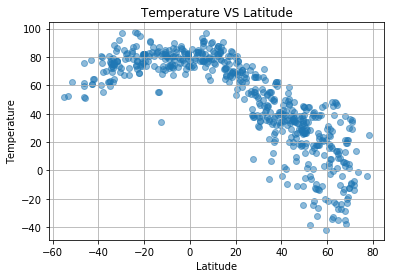

In [57]:
plt.scatter(df["Latitude"], df["Temperature"],alpha=0.5)
plt.title("Temperature VS Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.savefig("Temperature VS Latitude.png")

In [58]:
df.columns

Index(['Temperature', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Latitude',
       'city'],
      dtype='object')

In [60]:
df["Humidity"]=df["Humidity"].clip(0,100)

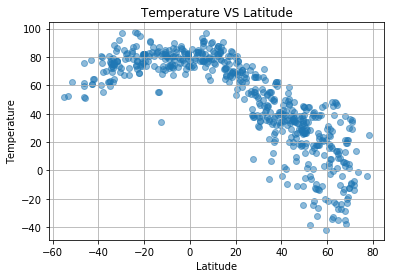

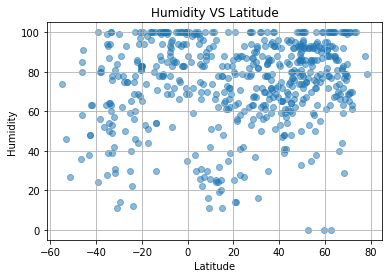

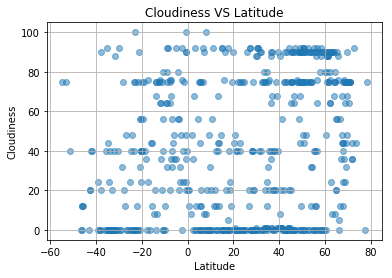

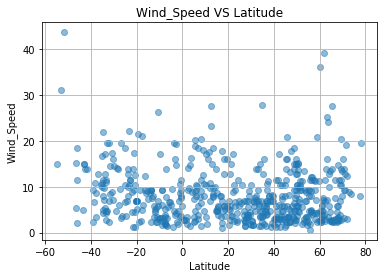

In [61]:
labels=["Temperature", "Humidity", "Cloudiness", "Wind_Speed"]
for label in labels:
    plt.scatter(df["Latitude"], df[label],alpha=0.5)
    plt.title(f"{label} VS Latitude")
    plt.xlabel("Latitude")
    plt.ylabel(label)
    plt.grid()
    plt.savefig(f"{label} VS Latitude.png")
    plt.show()    

In [62]:
def temperature_conversion(x):
    return (x-32)*5/9
temperature_conversion(32)
    
    

0.0

In [68]:
df["celcius"]= df["Temperature"].apply(temperature_conversion)
df.head()

,Temperature,Humidity,Cloudiness,Wind_Speed,Latitude,city,celcius
0,77.15,84,44,2.51,5.56,banda aceh,25.083333
1,62.16,100,0,12.80,-33.64,busselton,16.755556
2,71.93,99,92,7.20,-30.17,cidreira,22.183333
3,80.60,69,90,11.41,-0.74,puerto ayora,27.000000
4,35.28,61,75,10.29,42.65,albany,1.822222
